# Human Activity Recognition:

# Business Problem:

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

# Data : 

  The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

  The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# Feature Information :

For each record in the dataset it is provided: 
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.

# Class Labels: 

In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.
1. WALKING as 1
2. WALKING_UPSTAIRS as 2
3. WALKING_DOWNSTAIRS as 3
4. SITTING as 4
5. STANDING as 5
6. LAYING as 6

# Machine Learning Problem : 

  It is a Multi-class classification.

# Load Data : 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)


def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'C:/Users/Friend/AI/AI_datasets/HumanActivityRecognition/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        )
    return np.transpose(signals_data, (1, 2, 0))



def load_y(subset):
    filename = f'C:/Users/Friend/AI/AI_datasets/HumanActivityRecognition/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()


def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

X_train, X_test, Y_train, Y_test = load_data()

C:\Users\Friend\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Friend\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(set([tuple(category) for category in Y_train]))

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


#  Deep Learning Models: 

In [5]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [6]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [7]:
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\Friend\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

# LSTM with 1 hidden Layer: 

In [15]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [10]:
epochs = 30
batch_size = 16
n_hidden = 32

In [11]:
model1 = Sequential()
model1.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [12]:
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model1.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 59s 8ms/step - loss: 1.3139 - acc: 0.4358 - val_loss: 1.1352 - val_acc: 0.4700
Epoch 2/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.9788 - acc: 0.5773 - val_loss: 0.9513 - val_acc: 0.5884
Epoch 3/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.7977 - acc: 0.6457 - val_loss: 0.8343 - val_acc: 0.6013
Epoch 4/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.6989 - acc: 0.6582 - val_loss: 0.7532 - val_acc: 0.6098
Epoch 5/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.6359 - acc: 0.6797 - val_loss: 0.7335 - val_acc: 0.6183
Epoch 6/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.5819 - acc: 0.6865 - val_loss: 0.8786 - val_acc: 0.6098
Epoch 7/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.5676 - acc: 0.7058 - val_loss: 0.8191 - val_acc: 0.6132
Epoch 8

In [13]:
print(confusion_matrix(Y_test, model1.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      383       108        0                   0   
STANDING                 0       99       432        1                   0   
WALKING                  0        0         0      472                  23   
WALKING_DOWNSTAIRS       0        0         0       27                 381   
WALKING_UPSTAIRS         0        0         1       61                  12   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                12  
WALKING_UPSTAIRS                 397  


2947/2947 [==============================] - 1s 420us/step
Test score: 0.48826993001486146
Test accuracy: 0.8829317950458093


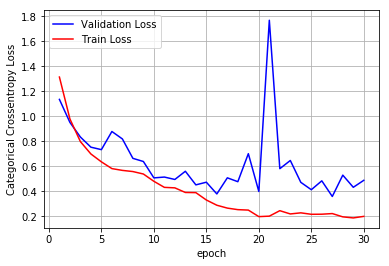

In [16]:
score1 = model1.evaluate(X_test, Y_test)

print('Test score:', score1[0]) 
print('Test accuracy:', score1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

# LSTM with 2 hidden Layers: 

In [17]:
epochs = 30
batch_size = 16

# Hidden Layers = 32,Drop-out = 0.6

In [18]:
n_hidden = 32
model2 = Sequential()
model2.add(LSTM(n_hidden,return_sequences=True,input_shape=(timesteps, input_dim)))
model2.add(Dropout(0.6))
model2.add(LSTM(n_hidden))
model2.add(Dropout(0.6))
model2.add(Dense(n_classes, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model2.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 71s 10ms/step - loss: 1.1998 - acc: 0.5178 - val_loss: 0.8683 - val_acc: 0.6440
Epoch 2/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.8431 - acc: 0.6272 - val_loss: 0.8084 - val_acc: 0.6152
Epoch 3/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.7142 - acc: 0.6974 - val_loss: 0.7453 - val_acc: 0.7017
Epoch 4/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.6332 - acc: 0.7550 - val_loss: 0.7667 - val_acc: 0.7133
Epoch 5/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.5030 - acc: 0.8192 - val_loss: 0.6905 - val_acc: 0.8083
Epoch 6/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.3889 - acc: 0.8886 - val_loss: 0.5145 - val_acc: 0.8375
Epoch 7/30
7352/7352 [==============================] - 70s 9ms/step - loss: 0.3122 - acc: 0.9140 - val_loss: 0.3979 - val_acc: 0.8738
Epoch 

In [20]:
print(confusion_matrix(Y_test, model2.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      409        73        6                   0   
STANDING                 0       94       437        1                   0   
WALKING                  0        0         0      467                   2   
WALKING_DOWNSTAIRS       0        0         0       12                 371   
WALKING_UPSTAIRS         0        0         0       15                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            3  
STANDING                           0  
WALKING                           27  
WALKING_DOWNSTAIRS                37  
WALKING_UPSTAIRS                 456  


2947/2947 [==============================] - 3s 967us/step
Test score: 0.5947882716293358
Test accuracy: 0.8992195453003053


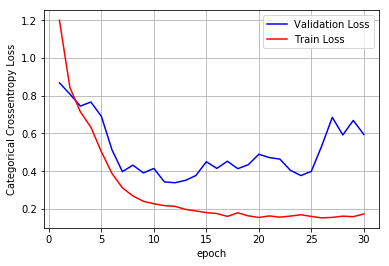

In [21]:
score2 = model2.evaluate(X_test, Y_test)

print('Test score:', score2[0]) 
print('Test accuracy:', score2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

# Hidden Layers = 64,Drop-out = 0.6

In [22]:
n_hidden = 64
drop_out = 0.6
model3 = Sequential()
model3.add(LSTM(n_hidden,return_sequences=True,input_shape=(timesteps, input_dim)))
model3.add(Dropout(drop_out))
model3.add(LSTM(n_hidden))
model3.add(Dropout(drop_out))
model3.add(Dense(n_classes, activation='sigmoid'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 52,358
Trainable params: 52,358
Non-trainable params: 0
_________________________________________________________________


In [23]:
model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model3.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 99s 13ms/step - loss: 1.1031 - acc: 0.5199 - val_loss: 1.0280 - val_acc: 0.5667
Epoch 2/30
7352/7352 [==============================] - 95s 13ms/step - loss: 0.7983 - acc: 0.6495 - val_loss: 0.7187 - val_acc: 0.6932
Epoch 3/30
7352/7352 [==============================] - 95s 13ms/step - loss: 0.6560 - acc: 0.7171 - val_loss: 0.6754 - val_acc: 0.7177
Epoch 4/30
7352/7352 [==============================] - 98s 13ms/step - loss: 0.5287 - acc: 0.7643 - val_loss: 0.5936 - val_acc: 0.7472
Epoch 5/30
7352/7352 [==============================] - 98s 13ms/step - loss: 0.4408 - acc: 0.8017 - val_loss: 0.5514 - val_acc: 0.7947
Epoch 6/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.3725 - acc: 0.8645 - val_loss: 0.4454 - val_acc: 0.8395
Epoch 7/30
7352/7352 [==============================] - 93s 13ms/step - loss: 0.2395 - acc: 0.9232 - val_loss: 0.6714 - val_acc: 0.8191


In [24]:
print(confusion_matrix(Y_test, model3.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 497        0        27        0                  12   
SITTING                  2      354       135        0                   0   
STANDING                 0       54       478        0                   0   
WALKING                  0        1         1      460                  14   
WALKING_DOWNSTAIRS       0        0         0        0                 419   
WALKING_UPSTAIRS         0       12         0        4                  10   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             1  
SITTING                            0  
STANDING                           0  
WALKING                           20  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 445  


2947/2947 [==============================] - 9s 3ms/step
Test score: 0.6063831242102351
Test accuracy: 0.9002375296912114


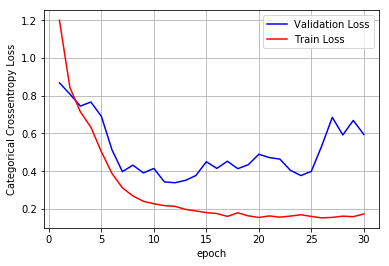

In [27]:
score3 = model3.evaluate(X_test, Y_test)

print('Test score:', score3[0]) 
print('Test accuracy:', score3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

# Hidden Layers = 32,Drop-out = 0.8

In [28]:
n_hidden = 32
drop_out = 0.8
model4 = Sequential()
model4.add(LSTM(n_hidden,return_sequences=True,input_shape=(timesteps, input_dim)))
model4.add(Dropout(drop_out))
model4.add(LSTM(n_hidden))
model4.add(Dropout(drop_out))
model4.add(Dense(n_classes, activation='sigmoid'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________


In [29]:
model4.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model4.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 131s 18ms/step - loss: 1.4410 - acc: 0.4217 - val_loss: 1.1411 - val_acc: 0.4656
Epoch 2/30
7352/7352 [==============================] - 130s 18ms/step - loss: 1.0816 - acc: 0.5394 - val_loss: 0.9022 - val_acc: 0.5898
Epoch 3/30
7352/7352 [==============================] - 134s 18ms/step - loss: 0.9246 - acc: 0.5894 - val_loss: 0.8111 - val_acc: 0.6193
Epoch 4/30
7352/7352 [==============================] - 133s 18ms/step - loss: 0.8749 - acc: 0.6028 - val_loss: 0.8078 - val_acc: 0.6196
Epoch 5/30
7352/7352 [==============================] - 129s 18ms/step - loss: 0.8385 - acc: 0.6171 - val_loss: 0.7979 - val_acc: 0.6084
Epoch 6/30
7352/7352 [==============================] - 138s 19ms/step - loss: 0.8010 - acc: 0.6226 - val_loss: 0.7752 - val_acc: 0.6162
Epoch 7/30
7352/7352 [==============================] - 139s 19ms/step - loss: 0.7849 - acc: 0.6319 - val_loss: 0.7464 - val_acc: 

In [30]:
print(confusion_matrix(Y_test, model4.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_UPSTAIRS
True                                                                    
LAYING                 537        0         0        0                 0
SITTING                  9      430        50        2                 0
STANDING                 0      141       390        1                 0
WALKING                  1        0         0      467                28
WALKING_DOWNSTAIRS       0        0         0        2               418
WALKING_UPSTAIRS        11        1         0       40               419


2947/2947 [==============================] - 3s 1ms/step
Test score: 0.536436351557261
Test accuracy: 0.7611129962673906


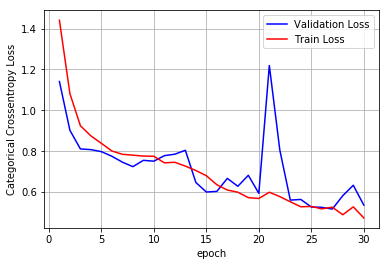

In [31]:
score4 = model4.evaluate(X_test, Y_test)

print('Test score:', score4[0]) 
print('Test accuracy:', score4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

# Hidden Layers = 64,Drop-out = 0.8

In [32]:
n_hidden = 64
drop_out = 0.8
model5 = Sequential()
model5.add(LSTM(n_hidden,return_sequences=True,input_shape=(timesteps, input_dim)))
model5.add(Dropout(drop_out))
model5.add(LSTM(n_hidden))
model5.add(Dropout(drop_out))
model5.add(Dense(n_classes, activation='sigmoid'))
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 52,358
Trainable params: 52,358
Non-trainable params: 0
_________________________________________________________________


In [33]:
model5.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model5.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 92s 13ms/step - loss: 1.2349 - acc: 0.4819 - val_loss: 0.8841 - val_acc: 0.5643
Epoch 2/30
7352/7352 [==============================] - 88s 12ms/step - loss: 0.8676 - acc: 0.6099 - val_loss: 0.8622 - val_acc: 0.5830
Epoch 3/30
7352/7352 [==============================] - 98s 13ms/step - loss: 0.8102 - acc: 0.6296 - val_loss: 0.8227 - val_acc: 0.6023 - loss: 0.8111 - acc: 0.6
Epoch 4/30
7352/7352 [==============================] - 95s 13ms/step - loss: 0.6975 - acc: 0.6737 - val_loss: 0.7357 - val_acc: 0.6230
Epoch 5/30
7352/7352 [==============================] - 102s 14ms/step - loss: 0.6466 - acc: 0.6972 - val_loss: 0.6956 - val_acc: 0.7279
Epoch 6/30
7352/7352 [==============================] - 91s 12ms/step - loss: 0.6378 - acc: 0.7223 - val_loss: 0.6277 - val_acc: 0.7336
Epoch 7/30
7352/7352 [==============================] - 93s 13ms/step - loss: 0.5218 - acc: 0.7764 - val_loss

In [34]:
print(confusion_matrix(Y_test, model5.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 521        0        16        0                   0   
SITTING                  6      375        91        1                   0   
STANDING                 0       77       455        0                   0   
WALKING                  0        0         0      473                  14   
WALKING_DOWNSTAIRS       3        0         0        0                 411   
WALKING_UPSTAIRS         5        5         1        5                  19   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           18  
STANDING                           0  
WALKING                            9  
WALKING_DOWNSTAIRS                 6  
WALKING_UPSTAIRS                 436  


2947/2947 [==============================] - 10s 3ms/step
Test score: 0.47634486136884424
Test accuracy: 0.9063454360366474


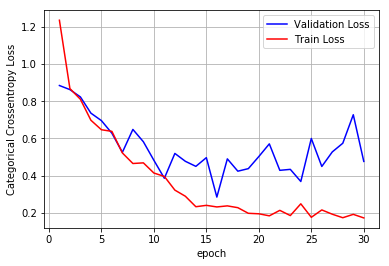

In [35]:
score5 = model5.evaluate(X_test, Y_test)

print('Test score:', score5[0]) 
print('Test accuracy:', score5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

# Summary:

1. Data Pre-processing :For each window we have 561 features which on signal processed each window gives 128 time-steps.And at every time-step we have 9 time-series readings.Three gyroscope time-series data,three accelerometer time-series data for body and total accelerometer time-series data.
2. Load Data : taking all these values and get train and test to model.
3. Initialising : random seed,epochs,hidden Layer,drop-out
4. Import : Keras,Tensor Flow,Sequential,LSTM
5. Input data : (7352*128*9);128 time steps,at every time step we have 9 time-series reading and 7352 time-series data(overlapped windows).
6. Training a model : Since the data input is very less,it is easy for the model to overfit if our model is complexly built.Hence choosing a simple LSTM architecture.
7. I have trained 5 models with different hidden and drop out values.The summary of the output is shown below.

# Conclusion:

In [36]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model", "Nuerons", "Drop-out rate", "score"]

Table.add_row(["LSTM(Single Layer)", 32, 0.6,score1])
Table.add_row(["LSTM(Double Layer)", 32,0.6, score2])
Table.add_row(["LSTM(Double Layer)", 64, 0.6,score3])
Table.add_row(["LSTM(Double Layer)", 32, 0.8,score4])
Table.add_row(["LSTM(Double Layer)", 64, 0.8,score5])

print(Table)

+--------------------+---------+---------------+-------------------------------------------+
|       Model        | Nuerons | Drop-out rate |                   score                   |
+--------------------+---------+---------------+-------------------------------------------+
| LSTM(Single Layer) |    32   |      0.6      | [0.48826993001486146, 0.8829317950458093] |
| LSTM(Double Layer) |    32   |      0.6      |  [0.520119141131976, 0.8880217170003394]  |
| LSTM(Double Layer) |    64   |      0.6      |  [0.3858033237633154, 0.9284017645062775] |
| LSTM(Double Layer) |    32   |      0.8      |  [0.6408101797361757, 0.7441465897522904] |
| LSTM(Double Layer) |    64   |      0.8      |  [0.5258364012132946, 0.9026128266033254] |
+--------------------+---------+---------------+-------------------------------------------+
